# Solution of the 2D Poisson problem with Dirichlet boundary conditions

source module for methodsNM imported.


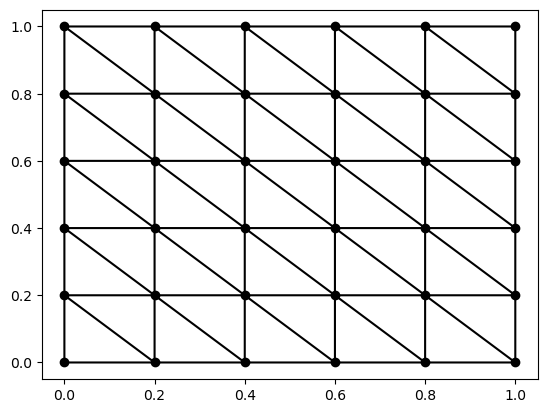

In [1]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import *
N = 5
mesh = StructuredRectangleMesh(N,N)
h = 1.0/N
DrawMesh2D(mesh)

On the mesh, we define a finite element space:

In [2]:
from methodsnm.fes import *
fes = P3_Triangle_Space(mesh)

On the mesh, with the given finite element space, we define the variational formulation:
$$
\int_{\Omega} \nabla u \cdot \nabla v dx = \int_{\Omega} f v dx
$$
Replacing 
* $u \leadsto u_h = \sum_j u_j \phi_j $ and
* $v \leadsto v_h = \phi_i$
with $u_h, v_h \in V_{h}$ (for now)
we obtain a linear system:

In [4]:
from methodsnm.forms import *
from methodsnm.formint import *
from numpy import pi, cos, sin

blf = BilinearForm(fes)
c = GlobalFunction(lambda x: 1, mesh = mesh)
blf += LaplaceIntegral_Lehrenfeld(c)
blf.assemble()

lf = LinearForm(fes)
f = GlobalFunction(lambda x: 2 * pi**2 * sin(pi*x[0]) * sin(pi*x[1]), mesh = mesh)
lf += SourceIntegral(f)
lf.assemble()

blf.matrix

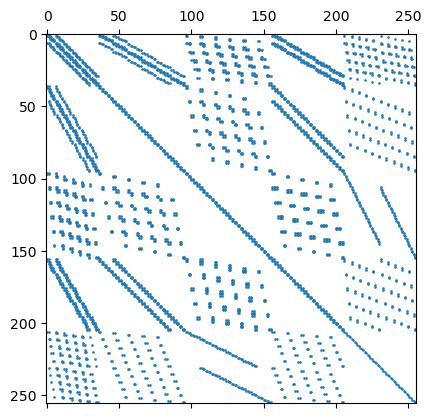

In [5]:
plt.spy(blf.matrix, markersize=4*h)

Now, we mark all boundary degrees of freedoms as Dirichlet dofs:

In [6]:
dirichlet_mask = np.zeros(fes.ndof,dtype=bool)
for belnr, verts in enumerate(mesh.elements(bndry=True)):
    dirichlet_mask[fes.element_dofs(belnr, bndry=True)]=True
non_dirichlet_mask = np.logical_not(dirichlet_mask)
#print(non_dirichlet_mask)    

In [7]:
A = blf.matrix[non_dirichlet_mask,:][:,non_dirichlet_mask]
b = lf.vector[non_dirichlet_mask]
print(blf.matrix.shape, " -> ", A.shape)

(256, 256)  ->  (196, 196)


In [8]:
uh = FEFunction(fes)
from scipy.sparse.linalg import spsolve

uh.vector[non_dirichlet_mask] = spsolve(A, b)

Finally, we can visualize the solution:

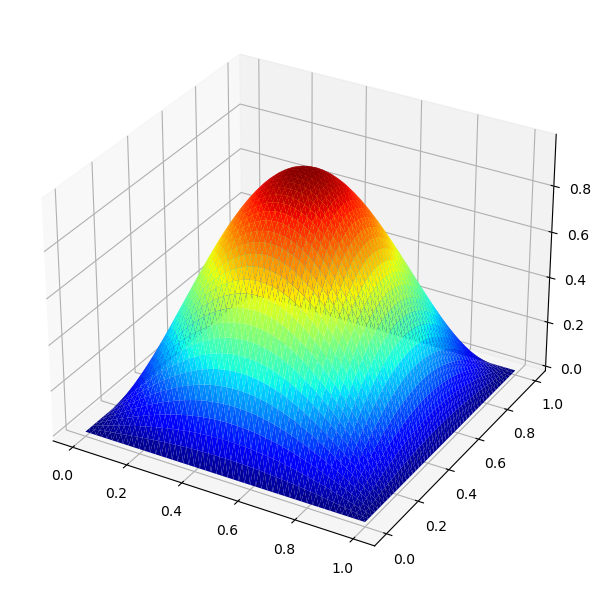

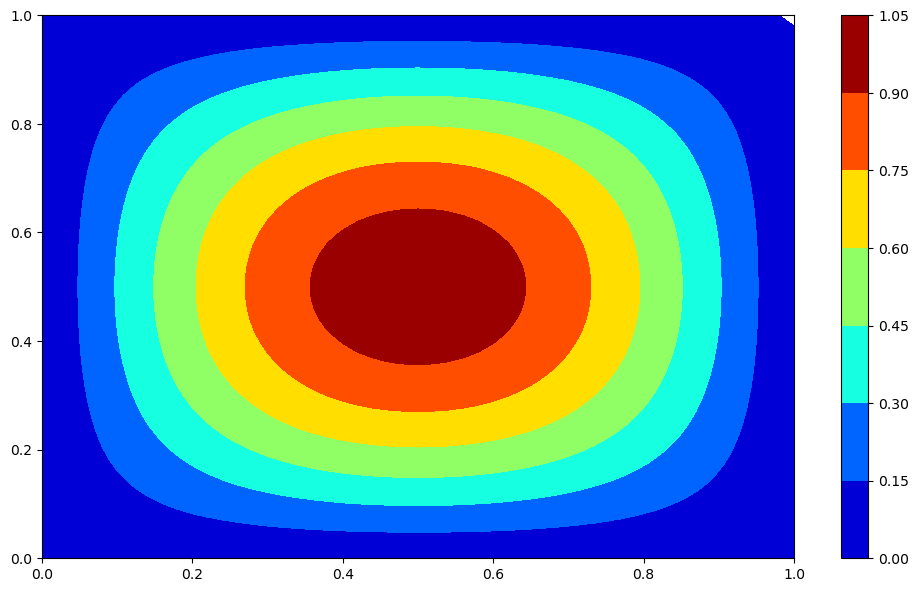

In [9]:
DrawFunction2D(uh, contour=False)
DrawFunction2D(uh, contour=True)

In [10]:
from methodsnm.forms import compute_difference_L2
uex =  GlobalFunction(lambda x: sin(pi*x[0]) * sin(pi*x[1]), mesh = mesh)
l2diff = compute_difference_L2(uh, uex, mesh, intorder = 6)
print("l2diff =", l2diff)

l2diff = 0.00012066105983708056
